In [41]:
import numpy as np
import pandas as pd
import re

In [42]:
train_data = pd.read_json('train_data.json',orient="index")
test_data = pd.read_json('test_data.json',orient='index')

In [43]:
#set index
train_data.reset_index(level = 0, inplace = True)
train_data.rename(columns={'index':'ID'}, inplace=True)

test_data.reset_index(level = 0, inplace = True)
test_data.rename(columns={'index':'ID'}, inplace=True)

In [44]:
#check data
print ('Train data has {} rows and {} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('test_data data has {} rows and {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data has 200000 rows and 7 columns
test_data data has 100000 rows and 6 columns


In [45]:
#Encode Target Variable
train_data = train_data.replace({'segment':{'pos':1,'neg':0}})

In [46]:
#check target variable count
train_data['segment'].value_counts()/train_data.shape[0]

0    0.923725
1    0.076275
Name: segment, dtype: float64

### Creating separate columns for genres and dow variables


#### train data

In [47]:
train_data['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train_data['genres']]
train_data['g1'] = train_data['g1'].apply(lambda x: x.split(','))

train_data['g2'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train_data['dow']]
train_data['g2'] = train_data['g2'].apply(lambda x: x.split(','))

t1 = pd.Series(train_data['g1']).apply(frozenset).to_frame(name='t_genre')
t2 = pd.Series(train_data['g2']).apply(frozenset).to_frame(name='t_dow')

In [48]:
# using frozenset trick - might take few minutes to process
for t_genre in frozenset.union(*t1.t_genre):
    t1[t_genre] = t1.apply(lambda _: int(t_genre in _.t_genre), axis=1)

In [49]:
for t_dow in frozenset.union(*t2.t_dow):
    t2[t_dow] = t2.apply(lambda _: int(t_dow in _.t_dow), axis = 1)

In [50]:
train_data = pd.concat([train_data.reset_index(drop=True), t1], axis=1)
train_data = pd.concat([train_data.reset_index(drop=True), t2], axis=1)

#### test data

In [51]:
test_data['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in test_data['genres']]
test_data['g1'] = test_data['g1'].apply(lambda x: x.split(','))

test_data['g2'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in test_data['dow']]
test_data['g2'] = test_data['g2'].apply(lambda x: x.split(','))

t1_te = pd.Series(test_data['g1']).apply(frozenset).to_frame(name='t_genre')
t2_te = pd.Series(test_data['g2']).apply(frozenset).to_frame(name='t_dow')


In [52]:
for t_genre in frozenset.union(*t1_te.t_genre):
    t1_te[t_genre] = t1_te.apply(lambda _: int(t_genre in _.t_genre), axis=1)

In [53]:
for t_dow in frozenset.union(*t2_te.t_dow):
    t2_te[t_dow] = t2_te.apply(lambda _: int(t_dow in _.t_dow), axis = 1)

In [54]:
test_data = pd.concat([test_data.reset_index(drop=True), t1_te], axis=1)
test_data = pd.concat([test_data.reset_index(drop=True), t2_te], axis=1)

### sum of watch time from titles

In [55]:
#the rows aren't list exactly. They are object, so we convert them to list and extract the watch time
w1 = train_data['titles']
w1 = w1.str.split(',')

#create a nested list of numbers
main = []
for i in np.arange(train_data.shape[0]):
    d1 = w1[i]
    nest = []
    nest = [re.sub(pattern = '.*\:', repl=' ', string= d1[k]) for k in list(np.arange(len(d1)))]
    main.append(nest)

#### Turns out, there are blank values in the list, we need to fix them before we could add
#### Fixing blanks in the list now

In [56]:
blanks = []
for i in np.arange(len(main)):
    if '' in main[i]:
        print "{} blanks found".format(len(blanks))
        blanks.append(i)
        
#replacing blanks with 0
for i in blanks:
    main[i] = [x.replace('','0') for x in main[i]]
    
#converting string to integers
main = [[int(y) for y in x] for x in main]

#adding the watch time
tosum = []
for i in np.arange(len(main)):
    s = sum(main[i])
    tosum.append(s)

0 blanks found
1 blanks found
2 blanks found
3 blanks found
4 blanks found
5 blanks found
6 blanks found
7 blanks found
8 blanks found
9 blanks found
10 blanks found
11 blanks found
12 blanks found
13 blanks found
14 blanks found
15 blanks found
16 blanks found
17 blanks found
18 blanks found
19 blanks found
20 blanks found
21 blanks found
22 blanks found
23 blanks found
24 blanks found
25 blanks found
26 blanks found
27 blanks found
28 blanks found
29 blanks found
30 blanks found
31 blanks found
32 blanks found
33 blanks found
34 blanks found
35 blanks found
36 blanks found
37 blanks found
38 blanks found
39 blanks found
40 blanks found
41 blanks found
42 blanks found
43 blanks found
44 blanks found
45 blanks found


In [57]:
train_data['title_sum'] = tosum

In [58]:
#making changes in test data
w1_te = test_data['titles']
w1_te = w1_te.str.split(',')

In [59]:
main_te = []
for i in np.arange(test_data.shape[0]):
    d1 = w1_te[i]
    nest = []
    nest = [re.sub(pattern = '.*\:', repl=' ', string= d1[k]) for k in list(np.arange(len(d1)))]
    main_te.append(nest)

In [60]:
blanks_te = []
for i in np.arange(len(main_te)):
    if '' in main_te[i]:
        print "{} blanks found".format(len(blanks_te))
        blanks_te.append(i)
        
#replacing blanks with 0
for i in blanks_te:
    main_te[i] = [x.replace('','0') for x in main_te[i]]
    
#converting string to integers
main_te = [[int(y) for y in x] for x in main_te]

#adding the watch time
tosum_te = []
for i in np.arange(len(main_te)):
    s = sum(main_te[i])
    tosum_te.append(s)

0 blanks found
1 blanks found
2 blanks found
3 blanks found
4 blanks found
5 blanks found
6 blanks found
7 blanks found
8 blanks found
9 blanks found
10 blanks found
11 blanks found


In [61]:
test_data['title_sum'] = tosum_te

### create count variables

In [62]:
#count variables
def wcount(p):
    return p.count(',')+1

In [63]:
train_data['title_count'] = train_data['titles'].map(wcount)
train_data['genres_count'] = train_data['genres'].map(wcount)
train_data['cities_count'] = train_data['cities'].map(wcount)
train_data['tod_count'] = train_data['tod'].map(wcount)
train_data['dow_count'] = train_data['dow'].map(wcount)


test_data['title_count'] = test_data['titles'].map(wcount)
test_data['genres_count'] = test_data['genres'].map(wcount)
test_data['cities_count'] = test_data['cities'].map(wcount)
test_data['tod_count'] = test_data['tod'].map(wcount)
test_data['dow_count'] = test_data['dow'].map(wcount)

In [64]:
#log Transformation
train_data['title_count'] = np.log(train_data['title_count'])
test_data['title_count'] = np.log(test_data['title_count'])

### remove variables

In [65]:
test_id = test_data['ID']
train_data.drop(['ID','cities','dow','genres','titles','tod','g1','g2','t_genre','t_dow'], inplace=True, axis=1)
test_data.drop(['ID','cities','dow','genres','titles','tod','g1','g2','t_genre','t_dow'], inplace=True, axis=1)

### training data

In [66]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [67]:
target = train_data['segment']
train_data.drop('segment',axis=1, inplace=True)
train_data.drop(['1','2','3','4','5','6','7','Science','Hockey','Wildlife','Reality','Badminton','Travel','Thriller','Horror','dow_count'],axis=1, inplace=True)
test_data.drop(['1','2','3','4','5','6','7','Science','Hockey','Wildlife','Reality','Badminton','Travel','Thriller','Horror','dow_count'],axis=1, inplace=True)

In [68]:
#train final model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot

model = XGBClassifier(learning_rate = 0.2)
model.fit(train_data,target)
#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#param_grid = dict(learning_rate=learning_rate)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
#grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
#grid_result = grid_search.fit(train_data, target)
#summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
# plot
#pyplot.errorbar(learning_rate, means, yerr=stds)
#pyplot.title("XGBoost learning_rate vs Log Loss")
#pyplot.xlabel('learning_rate')
#pyplot.ylabel('Log Loss')
#pyplot.savefig('learning_rate.png')

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

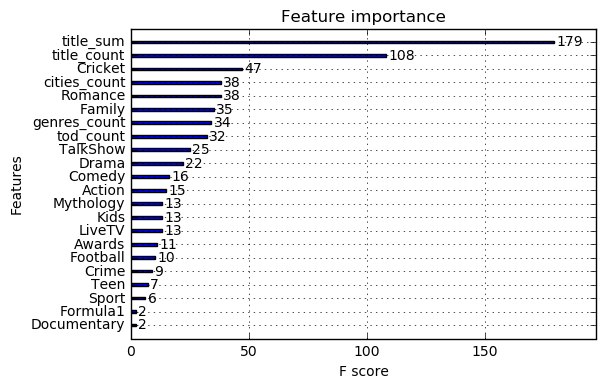

In [69]:
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

In [70]:
cols = train_data.columns.tolist()
test_data = test_data[cols]
pred = model.predict_proba(test_data)

In [71]:
columns = ['segment']
sub = pd.DataFrame(data=pred[:,1], columns=columns)
sub['ID'] = test_id
sub = sub[['ID','segment']]
sub.to_csv("XG_Final.csv", index=False)